**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
plt.style.use('classic')
random.seed(42)

In [3]:
train_data = pd.read_csv('https://raw.githubusercontent.com/HaoyangMarcusYu/portfolio/main/Problem_set_2/Classification_Train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/HaoyangMarcusYu/portfolio/main/Problem_set_2/Classification_Test.csv')

In [4]:
train_data.head()

,Unnamed: 0,bull_market,Daily_ROI_past_ma5
0,0,1,NaN
1,1,1,0.027606
2,2,1,0.019906
3,3,0,0.018206
4,4,1,0.008195


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1246 non-null   int64  
 1   bull_market         1246 non-null   int64  
 2   Daily_ROI_past_ma5  1245 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 29.3 KB


In [6]:
test_data.head()

,Unnamed: 0,bull_market,Daily_ROI_past_ma5
0,1246,1,-0.002607
1,1247,0,-0.000485
2,1248,1,0.002352
3,1249,1,0.009253
4,1250,1,0.010573


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          623 non-null    int64  
 1   bull_market         623 non-null    int64  
 2   Daily_ROI_past_ma5  623 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 14.7 KB


#The Rule of Thumb Algorithm

In [8]:
MA_WINDOW = 5

In [9]:
test_data['bull_market']

0      1
1      0
2      1
3      1
4      1
      ..
618    0
619    1
620    1
621    1
622    1
Name: bull_market, Length: 623, dtype: int64

In [10]:
pre_ROI=test_data['bull_market'].shift(1) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html
pre_ROI

0      NaN
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
618    0.0
619    0.0
620    1.0
621    1.0
622    1.0
Name: bull_market, Length: 623, dtype: float64

In [11]:
prev_ROI = test_data['bull_market'].shift(1)
bull_market_count = prev_ROI.rolling(window=MA_WINDOW).sum().dropna()

y_pred = bull_market_count >= 5
y_true = test_data.loc[y_pred.index]['bull_market']

In [12]:
#alternative methods to define y_pred
bull_market_mean = test_data['bull_market'].shift(1).rolling(window=MA_WINDOW).mean().dropna()

In [13]:
bull_market_mean

5      0.8
6      0.6
7      0.6
8      0.4
9      0.2
      ... 
618    0.8
619    0.6
620    0.6
621    0.6
622    0.6
Name: bull_market, Length: 618, dtype: float64

In [14]:
y_pred2 = bull_market_mean>=0.5

In [15]:
pd.DataFrame(y_pred).tail()

,bull_market
618,False
619,False
620,False
621,False
622,False


In [16]:
pd.DataFrame(y_pred2).tail()

,bull_market
618,True
619,True
620,True
621,True
622,True


In [17]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [18]:
# this class is only for performance benchmark
class NaiveAlgorithm(BaseEstimator):
    def __init__(self, y_pred):
        self.y_pred = y_pred
        self._estimator_type = 'classifier'
        
    def fit(self, X, y):
        pass

    def predict(self, X):
        return self.y_pred.loc[X].values.astype(int)
    

In [19]:
mdl = NaiveAlgorithm(y_pred=y_pred)

In [20]:
X_test = y_true.index.values

In [21]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.97      0.64       294
           1       0.47      0.02      0.05       324

    accuracy                           0.47       618
   macro avg       0.47      0.50      0.34       618
weighted avg       0.47      0.47      0.33       618



In [22]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


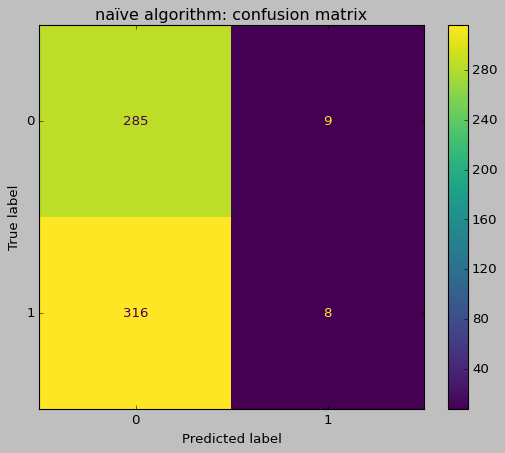

In [23]:
fig, ax = plt.subplots()
plot_confusion_matrix(mdl, X_test, y_true, ax=ax)
ax.set_title('naïve algorithm: confusion matrix')
fig.show()

# Machine Learning Classifier

## Define the Train and Test (X,y)

In [24]:
train_data.head()

,Unnamed: 0,bull_market,Daily_ROI_past_ma5
0,0,1,NaN
1,1,1,0.027606
2,2,1,0.019906
3,3,0,0.018206
4,4,1,0.008195


In [25]:
train_data.head()

,Unnamed: 0,bull_market,Daily_ROI_past_ma5
0,0,1,NaN
1,1,1,0.027606
2,2,1,0.019906
3,3,0,0.018206
4,4,1,0.008195


In [26]:
X_train = pd.DataFrame(train_data['Daily_ROI_past_ma5'].astype(float)).drop(0)
y_train = pd.DataFrame(train_data['bull_market'].astype(int)).drop(0)

In [27]:
X_train

,Daily_ROI_past_ma5
1,0.027606
2,0.019906
3,0.018206
4,0.008195
5,0.012578
...,...
1241,0.022690
1242,0.015323
1243,0.012964
1244,0.006227


In [28]:
y_train

,bull_market
1,1
2,1
3,0
4,1
5,0
...,...
1241,0
1242,0
1243,0
1244,1


In [29]:
test_data.head()

,Unnamed: 0,bull_market,Daily_ROI_past_ma5
0,1246,1,-0.002607
1,1247,0,-0.000485
2,1248,1,0.002352
3,1249,1,0.009253
4,1250,1,0.010573


In [30]:
X_test = pd.DataFrame(test_data['Daily_ROI_past_ma5'].astype(float))
y_test = pd.DataFrame(test_data['bull_market'].astype(int))

In [31]:
X_test

,Daily_ROI_past_ma5
0,-0.002607
1,-0.000485
2,0.002352
3,0.009253
4,0.010573
...,...
618,0.004384
619,0.003297
620,0.003696
621,0.004770


## Decision Tree Classifer

### Model

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [34]:
y_pred= mdl.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

### Evaluations

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.54      0.51       295
           1       0.54      0.50      0.52       328

    accuracy                           0.52       623
   macro avg       0.52      0.52      0.52       623
weighted avg       0.52      0.52      0.52       623



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


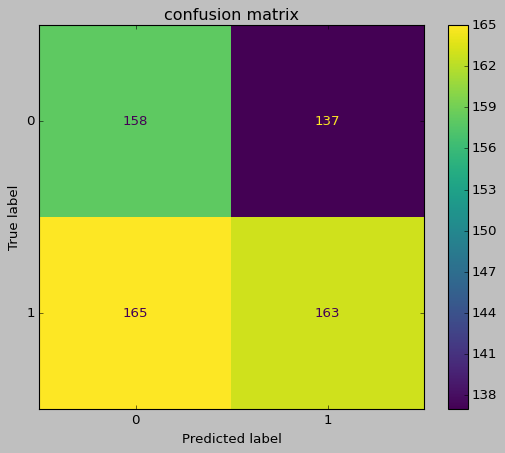

In [36]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

In [37]:
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


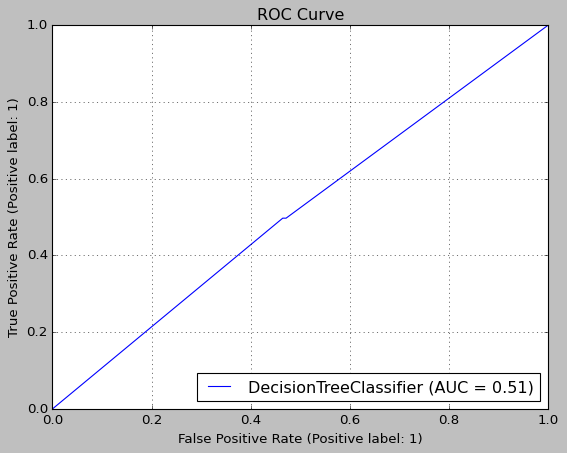

In [38]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-40-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [41]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51       295
           1       0.54      0.50      0.52       328

    accuracy                           0.51       623
   macro avg       0.51      0.51      0.51       623
weighted avg       0.51      0.51      0.51       623



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


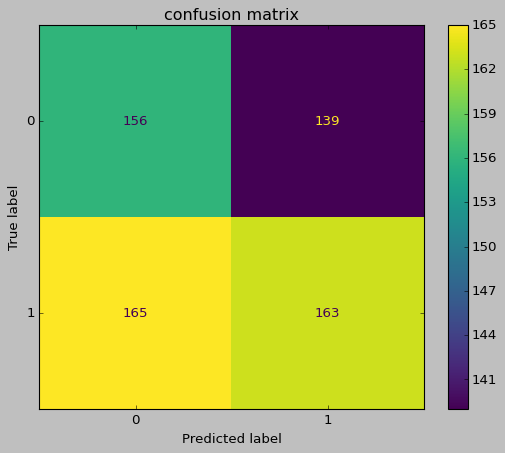

In [42]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


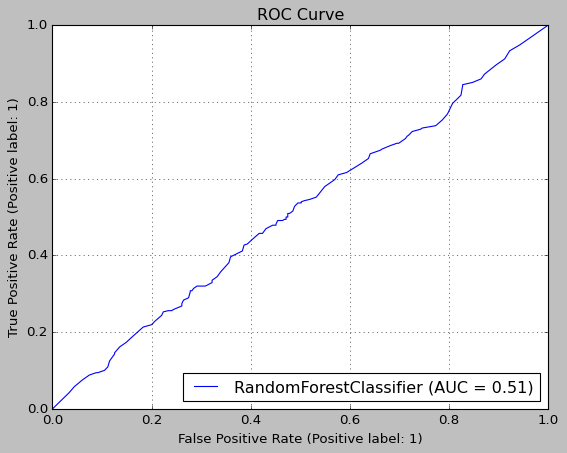

In [43]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Multi-Layer Classifier

In [44]:
from sklearn.neural_network import MLPClassifier

In [45]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64       295
           1       0.00      0.00      0.00       328

    accuracy                           0.47       623
   macro avg       0.24      0.50      0.32       623
weighted avg       0.22      0.47      0.30       623



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


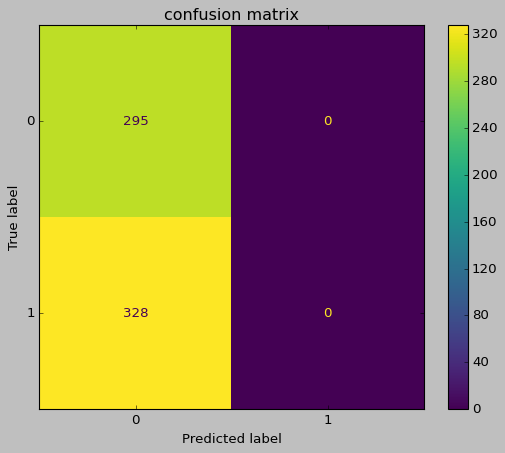

In [47]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

## Auto-ML Classifier

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [48]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 13.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━

In [49]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [50]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [51]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [52]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/classifier/"
AutoGluon Version:  0.6.0
Python Version:     3.8.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    1245
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    25944.37 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature base

In [53]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [54]:
predictor.leaderboard()

                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.550201       0.046435  3.026430                0.000693           0.445692            2       True         14
1       NeuralNetFastAI   0.546185       0.015171  2.071113                0.015171           2.071113            1       True         10
2        NeuralNetTorch   0.526104       0.006433  2.010422                0.006433           2.010422            1       True         12
3         LightGBMLarge   0.522088       0.030571  0.509624                0.030571           0.509624            1       True         13
4              LightGBM   0.518072       0.002537  0.256793                0.002537           0.256793            1       True          4
5            LightGBMXT   0.518072       0.002567  0.543597                0.002567           0.543597            1       True          3
6        KNeighborsUnif   0.506024

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.550201,0.046435,3.026430,0.000693,0.445692,2,True,14
1,NeuralNetFastAI,0.546185,0.015171,2.071113,0.015171,2.071113,1,True,10
2,NeuralNetTorch,0.526104,0.006433,2.010422,0.006433,2.010422,1,True,12
3,LightGBMLarge,0.522088,0.030571,0.509624,0.030571,0.509624,1,True,13
4,LightGBM,0.518072,0.002537,0.256793,0.002537,0.256793,1,True,4
5,LightGBMXT,0.518072,0.002567,0.543597,0.002567,0.543597,1,True,3
6,KNeighborsUnif,0.506024,0.007034,3.730377,0.007034,3.730377,1,True,1
7,RandomForestGini,0.506024,0.063063,0.686445,0.063063,0.686445,1,True,5
8,RandomForestEntr,0.506024,0.080665,0.817626,0.080665,0.817626,1,True,6
9,XGBoost,0.502008,0.006030,0.182460,0.006030,0.182460,1,True,11


In [55]:
from sklearn import linear_model
# calculate R2
from sklearn.metrics import r2_score

In [56]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

R2 Score: -1.0024080198429104


# Regression

## Define the Train and Test (X, y)

In [57]:
train_data.head()

,Daily_ROI_past_ma5,target
1,0.027606,1
2,0.019906,1
3,0.018206,0
4,0.008195,1
5,0.012578,0


In [58]:
y_train = pd.DataFrame(train_data['Daily_ROI_past_ma5'].astype(float))
X_train = pd.DataFrame(train_data['target'].astype(float))

In [59]:
test_data.head()

,Daily_ROI_past_ma5,target
0,-0.002607,1
1,-0.000485,0
2,0.002352,1
3,0.009253,1
4,0.010573,1


In [60]:
y_test = pd.DataFrame(test_data['Daily_ROI_past_ma5'].astype(float))
X_test = pd.DataFrame(test_data['target'].astype(float))

# Linear Regression

In [61]:
from sklearn import linear_model

In [62]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [63]:
# calculate R2
from sklearn.metrics import r2_score

In [64]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.010957252123082739


## Random Forest Regression

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-66-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [67]:
# calculate R2
from sklearn.metrics import r2_score

In [68]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.01059994742189918


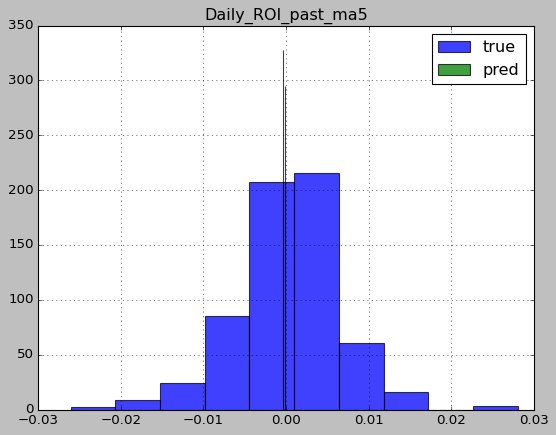

In [76]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
pd.Series(mdl.predict(X_test)).hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


Self-making Algorithm

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/HaoyangMarcusYu/portfolio/main/data/KHC.csv', index_col=0, parse_dates=[0])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-06,71.000000,74.290001,71.000000,72.959999,56.089752,3809700
2015-07-07,73.730003,74.709999,72.959999,74.629997,57.373604,5794300
2015-07-08,74.300003,75.500000,74.040001,75.400002,57.965557,4276600
2015-07-09,76.470001,77.066002,74.500000,74.800003,57.504307,4267100
2015-07-10,75.050003,77.800003,75.000000,77.309998,59.433929,4983000


In [72]:
stock_week = df['Close'].resample("W").mean()

In [73]:
stock_week

Date
2015-07-12    75.020000
2015-07-19    78.384000
2015-07-26    78.424001
2015-08-02    78.458000
2015-08-09    79.776001
                ...    
2022-11-06    38.164001
2022-11-13    37.771999
2022-11-20    37.480000
2022-11-27    38.800001
2022-12-04    39.316000
Freq: W-SUN, Name: Close, Length: 387, dtype: float64

In [83]:
stock_train = stock_week['2015':'2021'].dropna()

In [84]:
stock_train 

Date
2015-07-12    75.020000
2015-07-19    78.384000
2015-07-26    78.424001
2015-08-02    78.458000
2015-08-09    79.776001
                ...    
2021-11-28    35.327500
2021-12-05    33.632000
2021-12-12    33.910001
2021-12-19    35.130000
2021-12-26    35.157500
Freq: W-SUN, Name: Close, Length: 338, dtype: float64

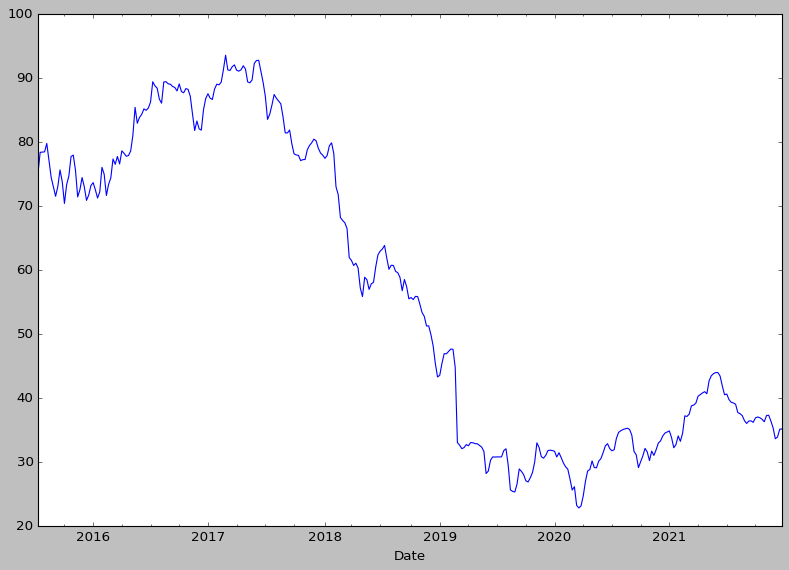

In [85]:
stock_train.plot(figsize=(12,8))

In [86]:
model = ARIMA(stock_train, order=(2, 0, 2))

In [87]:
result = model.fit()

In [88]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  338
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -618.039
Date:                Mon, 05 Dec 2022   AIC                           1248.077
Time:                        06:10:33   BIC                           1271.016
Sample:                    07-12-2015   HQIC                          1257.219
                         - 12-26-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.6213     19.584      2.891      0.004      18.237      95.006
ar.L1          1.4565      1.109      1.313      0.189      -0.717       3.630
ar.L2         -0.4584      1.105     -0.415      0.678      -2.623       1.707
ma.L1         -0.1922      1.114     -0.172      0.863      -2.377       1.992
ma.L2         -0.1665      0.288     -0.579      0.563      -0.730       0.397
sigma2         2.2326      0.092     24.252      0.000       2.052       2.413
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1042.65
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [105]:
pred = result.predict(339, 387, dynamic = True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [106]:
pred

2022-01-09    35.193634
2022-01-16    35.267634
2022-01-23    35.341545
2022-01-30    35.415276
2022-02-06    35.488788
2022-02-13    35.562061
2022-02-20    35.635087
2022-02-27    35.707864
2022-03-06    35.780390
2022-03-13    35.852665
2022-03-20    35.924689
2022-03-27    35.996464
2022-04-03    36.067991
2022-04-10    36.139269
2022-04-17    36.210300
2022-04-24    36.281085
2022-05-01    36.351624
2022-05-08    36.421918
2022-05-15    36.491969
2022-05-22    36.561777
2022-05-29    36.631343
2022-06-05    36.700667
2022-06-12    36.769751
2022-06-19    36.838596
2022-06-26    36.907202
2022-07-03    36.975570
2022-07-10    37.043700
2022-07-17    37.111595
2022-07-24    37.179254
2022-07-31    37.246678
2022-08-07    37.313869
2022-08-14    37.380826
2022-08-21    37.447552
2022-08-28    37.514046
2022-09-04    37.580309
2022-09-11    37.646343
2022-09-18    37.712147
2022-09-25    37.777723
2022-10-02    37.843072
2022-10-09    37.908195
2022-10-16    37.973091
2022-10-23    38

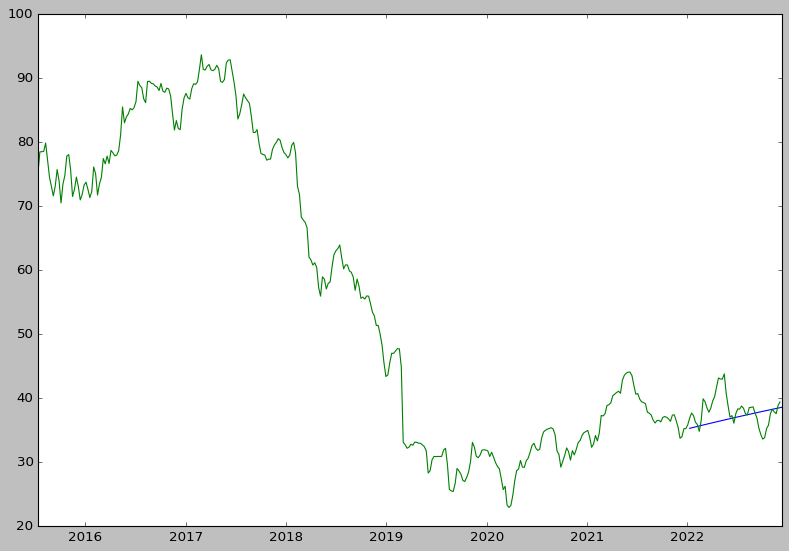

In [109]:
plt.figure(figsize=(12,8))
plt.plot(pred)
plt.plot(stock_week)
plt.show()